**1. 활성화 함수가 ReLU인 이층 신경망이 dictionary
$$
\{W_1 : \begin{bmatrix} 0&0&0&0&1 \\ -1&0&0&0&0 \\ 0&-1&0&0&0 \\ 0&0&-1&0&0 \\ 0&0&0&-1&0 \end{bmatrix},~
b_1 : [5,4,3,2,1],~
W_2 : \begin{bmatrix} 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0&1&0 \\ 0&0&0&0&1 \\ 1&0&0&0&0 \end{bmatrix},~
b_2 : [-1,-2,0,0,0]
\}
$$
로 주어져 있다.**

**(i) 3개의 데이터 $[1,2,3,4,5]$, $[2,3,4,5,6]$, $[3,4,5,6,7]$에 대하여 한번에 배치처리로 계산하여 소프트맥스(softmax)값을 구하시오.**

첫번째 Affine층을 통과시키면
$$
\begin{aligned}
&
\begin{pmatrix}
1&2&3&4&5\\
2&3&4&5&6\\
3&4&5&6&7
\end{pmatrix}
\begin{pmatrix} 0&0&0&0&1 \\ -1&0&0&0&0 \\ 0&-1&0&0&0 \\ 0&0&-1&0&0 \\ 0&0&0&-1&0 \end{pmatrix}
+
\begin{pmatrix}
5&4&3&2&1
\end{pmatrix}\\
=&
\begin{pmatrix}
-2&-3&-4&-5&1\\
-3&-4&-5&-6&2\\
-4&-5&-6&-7&3
\end{pmatrix}
+
\begin{pmatrix}
5&4&3&2&1
\end{pmatrix}\\
=&
\begin{pmatrix}
3&1&-1&-3&2\\
2&0&-2&-4&3\\
1&-1&-3&-5&4
\end{pmatrix}
\end{aligned}
$$
입니다.
덧셈은 브로드캐스팅 개념으로 이해하세요.
은닉층에서 ReLU 함수를 좌표별로 적용하면 음수가 죽게 되어
$$
\begin{pmatrix}
3&1&0&0&2\\
2&0&0&0&3\\
1&0&0&0&4
\end{pmatrix}
$$
가 나옵니다.
두번째 Affine층을 통과시키면
$$
\begin{aligned}
&
\begin{pmatrix}
3&1&0&0&2\\
2&0&0&0&3\\
1&0&0&0&4
\end{pmatrix}
\begin{pmatrix} 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0&1&0 \\ 0&0&0&0&1 \\ 1&0&0&0&0 \end{pmatrix}
+
\begin{pmatrix}
-1&-2&0&0&0
\end{pmatrix}\\
=&
\begin{pmatrix}
2&3&1&0&0\\
3&2&0&0&0\\
4&1&0&0&0
\end{pmatrix}
+
\begin{pmatrix}
-1&-2&0&0&0
\end{pmatrix}\\
=&
\begin{pmatrix}
1&1&1&0&0\\
2&0&0&0&0\\
3&-1&0&0&0
\end{pmatrix}
\end{aligned}
$$
입니다.
마지막으로 소프트맥스 변환을 합니다. 먼저 $e^x$을 적용하면
$$
\begin{pmatrix}
e&e&e&1&1\\
e^2&1&1&1&1\\
e^3&e^{-1}&1&1&1
\end{pmatrix}
$$
이고 노멀라이즈하면
$$
\begin{pmatrix}
{e \over 3e+2}&{e \over 3e+2}&{e \over 3e+2}&{1 \over 3e+2}&{1 \over 3e+2}\\
{e^2 \over e^2+4}&{1 \over e^2+4}&{1 \over e^2+4}&{1 \over e^2+4}&{1 \over e^2+4}\\
{e^3 \over e^3+e^{-1}+3} & {e^{-1} \over e^3+e^{-1}+3} & {1 \over e^3+e^{-1}+3} & {1 \over e^3+e^{-1}+3} & {1 \over e^3+e^{-1}+3}
\end{pmatrix}
$$
를 얻습니다.

**(ii) forward.py를 수정하여 검산하시오.**

In [1]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def init_network():
    network = {}
    network['W1'] = np.array([[0,0,0,0,1],[-1,0,0,0,0],[0,-1,0,0,0],[0,0,-1,0,0],[0,0,0,-1,0]])
    network['b1'] = np.array([5,4,3,2,1])
    network['W2'] = np.array([[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1],[1,0,0,0,0]])
    network['b2'] = np.array([-1,-2,0,0,0])
        
    return network

def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    a1 = np.dot(x,W1)+b1
    z1 = relu(a1)
    a2 = np.dot(z1,W2)+b2
    y = softmax(a2)
    
    return y

network = init_network()
x = np.array([[1,2,3,4,5],[2,3,4,5,6],[3,4,5,6,7]])
y = forward(network, x)
print(y)

[[0.26768323 0.26768323 0.26768323 0.09847516 0.09847516]
 [0.64878564 0.08780359 0.08780359 0.08780359 0.08780359]
 [0.85640133 0.01568554 0.04263771 0.04263771 0.04263771]]


위에서 손으로 계산한 결과와 맞는지 확인해보죠.

In [2]:
print(np.e/(3*np.e+2),1/(3*np.e+2),
      np.exp(2)/(np.exp(2)+4),1/(np.exp(2)+4),
      np.exp(3)/(np.exp(3)+np.exp(-1)+3),np.exp(-1)/(np.exp(3)+np.exp(-1)+3),1/(np.exp(3)+np.exp(-1)+3))

0.2676832288953427 0.09847515665698596 0.6487856442839393 0.08780358892901517 0.8564013281114377 0.01568553746952145 0.04263771147301363


**2. neuralnet_mnist_batch.py를 수정해서 가중치 행렬을 표준정규분포를 따라 랜덤하게 선택하고 편향 벡터는 제로 벡터로 놓고 정확도를 측정하시오.**

In [3]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch') # 각자의 경로로 수정해주세요.

np.random.randn과 np.zeors를 이용해 가중치 행렬과 편향벡터를 생성합니다.
가중치를 랜덤하게 생성했기 때문에 신경망의 예측은 그냥 찍는 거나 다름없습니다.
10지선다 문제를 찍는 상황이라 정답률은 대략 10프로정도 나옵니다.
실행할때마다 랜덤하게 가중치를 새로 생성하기 때문에 약간씩 달라집니다.

In [4]:
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    network = {}
    network['W1'] = np.random.randn(784,50)
    network['b1'] = np.zeros(50)
    network['W2'] = np.random.randn(50,100)
    network['b2'] = np.zeros(100)
    network['W3'] = np.random.randn(100,10)
    network['b3'] = np.zeros(10)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.1076


**3. neuralnet_mnist_batch.py를 수정해서 배치크기를 $1,2,3,\cdots,30$으로 잡았을때 각각 걸리는 시간을 측정해서 그래프로 표시하시오.**

batch_size를 100에서 [1,2,3,...,30]으로 바꾸고 각 배치 크기에 대해서 신경망의 처리 시간을 담을 빈 리스트 elapse를 만듭니다.
반복문으로 각 배치 크기에 대해 시간을 측정해 elapse에 기록합니다.

In [5]:
import time
import matplotlib.pyplot as plt

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("C://Users//HAN//Documents//Deep Learning from Scratch//ch03//sample_weight.pkl", 'rb') as f: # 각자의 경로로 수정해주세요.
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = np.arange(1,31) # 배치 크기
elapse = []

for k in batch_size:
    accuracy_cnt = 0
    start=time.time()
    for i in range(0, len(x), k):
        x_batch = x[i:i+k]
        y_batch = predict(network, x_batch)
        p = np.argmax(y_batch, axis=1)
        accuracy_cnt += np.sum(p == t[i:i+k])
    elapse.append(time.time()-start)

배치크기가 1일때와 30일때는 무려 10배의 속도 차이가 있네요.
데이터 처리양은 10,000장으로 동일하지만 배치크기가 1일때는 10,000번 액세스를 하고 배치크기가 30일때는 334번 액세스하기 때문에 그렇습니다.

In [6]:
print(elapse)

[0.5269348621368408, 0.2840116024017334, 0.2168111801147461, 0.18291592597961426, 0.14638900756835938, 0.12256646156311035, 0.12026429176330566, 0.09375953674316406, 0.09733724594116211, 0.09019255638122559, 0.07682132720947266, 0.056429386138916016, 0.06250691413879395, 0.04687905311584473, 0.046881675720214844, 0.04687786102294922, 0.046880483627319336, 0.04687952995300293, 0.041436195373535156, 0.050267934799194336, 0.04720950126647949, 0.03626751899719238, 0.05036211013793945, 0.0473635196685791, 0.031253814697265625, 0.03125405311584473, 0.04688000679016113, 0.039661407470703125, 0.040107011795043945, 0.0381009578704834]


그래프로 시각화 해보죠.

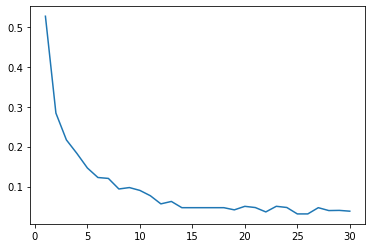

In [7]:
plt.plot(batch_size,elapse)
plt.show()

**4. neuralnet mnist error.py를 수정해서 다음에 답하시오.**

**(i) 신경망이 90프로 이상의 확신을 가지고 맞춘 이미지가 몇 프로인지 구하고 첫 25장의 이미지를 $5 \times 5$ 테이블로 출력하시오.**

맞춰야 하니까 p==t[i]로 수정하고 90프로 이상으로 예측해야 하므로 y[p]>0.9란 조건을 추가합니다.
조건이 두개 이상일 경우는 &로 연결합니다.
정확도가 93.52프로인데 75.19프로가 나왔기때문에 신경망이 맞출때 아리송하게 맞춘 데이터보다는 확신에 차서 맞춘 데이터가 훨씬 많다는 것을 알수 있네요.

In [8]:
confident=[]

for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if (p == t[i]) & (y[p]>0.9):
        confident.append(i)
        
print(len(confident)/len(x))

0.7519


정자체가 많고 악필은 안보이네요.
신경망이 확신에 차서 맞출만 하네요.

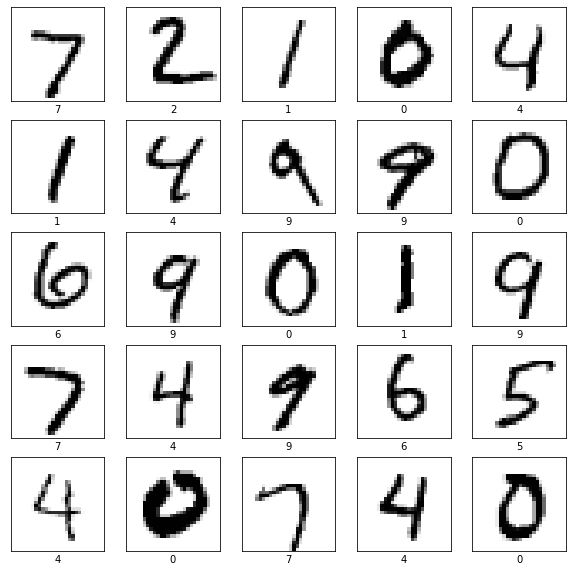

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[confident[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(str(t[confident[i]]))
plt.show()

**(ii) 신경망이 50프로 미만의 아리송하게 맞춘 이미지가 몇프로 인지 구하고 첫 25장의 이미지를 $5 \times 5$ 테이블로 출력하시오.**

여전히 맞추니까 p==t[i]는 그대로 두고 50프로 미만으로 예측해야 하므로 y[p]<0.5로 수정합니다.
정확도가 93.52프로인데 1.37프로가 나왔기때문에 신경망이 아리송하게 맞춘 데이터는 매우 적다는 것을 알수 있네요.

In [10]:
arikari=[]

for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if (p == t[i]) & (y[p]<0.5):
        arikari.append(i)
        
print(len(arikari)/len(x))

0.0137


악필이 많아서 신경망이 혼동할만 하네요.

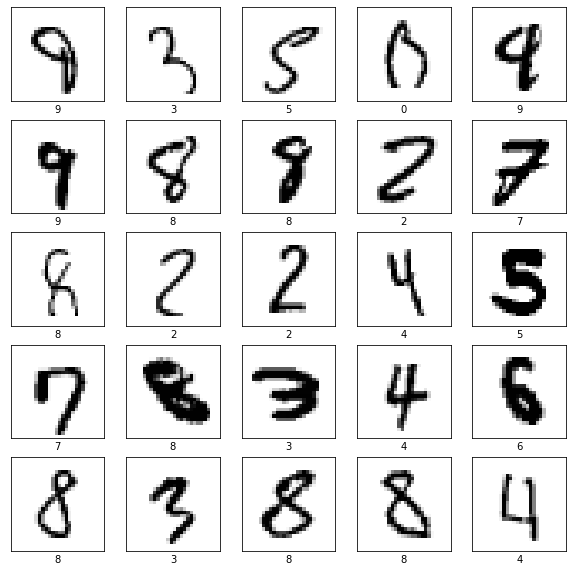

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[arikari[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(str(t[arikari[i]]))
plt.show()

**(iii) 신경망이 90프로 이상의 확신을 가지고 대답했으나 틀린 이미지가 몇프로 인지 구하고 첫 25장의 이미지를 $5 \times 5$ 테이블로 출력하시오. 이미지 밑 라벨 옆에 신경망이 답한 숫자도 표시하시오. 신경망이 왜 이렇게 대답했을지 설명하시오.**

틀렸으니까 p!=t[i]로 수정하고 90프로 이상으로 예측해야 하므로 y[p]>0.9로 수정합니다. 오류율이 6.48프로인데 0.53프로가 나왔기때문에 신경망이 확신에 차서 대답했음에도 틀린 문제는 오류율의 10프로정도를 차지한다고 볼수 있겠네요.
신경망이 답한 숫자도 표시해야 하므로 빈 리스트를 만들고 반복문을 통해 신경망이 답한 숫자도 채워 넣습니다.

In [12]:
sakura=[]
answer=[]
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if (p != t[i]) & (y[p]>0.9):
        sakura.append(i)
        answer.append(p)
        
print(len(sakura)/len(x))

0.0053


신경망이 왜 착각을 했을까요? 제 해석은 다음과 같습니다.

5→6 : 5의 아래획을 둥글게 감음

6→0 : 윗 획이 짧아서 0으로 착각한듯 합니다.

4→9 : 오른쪽 획이 짧아서 9로 착각한듯 합니다.

4→6 : 오른쪽과 아래 획이 뭉게져서 6으로 착각한듯합니다.

3→8 : 아래 획이 붙어서 8로 착각한듯 합니다.

7→2 : 서양인들은 7을 쓸때 획을 긋는 경우가 많습니다. 2의 아래획으로 착각한듯합니다.

7→1 : 세로획에 비해 가로획들이 너무 짧아 7로 착각한듯 합니다.

3→7 : 중간부분의 변곡이 너무 적어서 7로 착각한듯 합니다.

9→3 : 윗 획이 감겨있지 않아 4로 착각한듯 합니다.

2→0 : 아래 획이 너무 짧아 0으로 착각한 듯 합니다.

3→2 : 아래 획이 너무 짧아 2로 착각한듯 합니다.

인공신경망이 인간처럼 지능을 가지고 있는지 아니면 정교한 계산기일뿐인에 대한 논쟁이 있습니다.
구성만 보면 인공신경망은 입력된 벡터를 Affine 변환 Sigmoid 변환을 번갈아 적용한후 마지막에 softmax변환으로 확률벡터를 출력해내는 고도의 계산기일뿐입니다. 하지만 인공신경망이 하는 착각을 보면 인간도 공감할수 있는 자연스러운 면이 있습니다. 마치 지능처럼 보이지요.

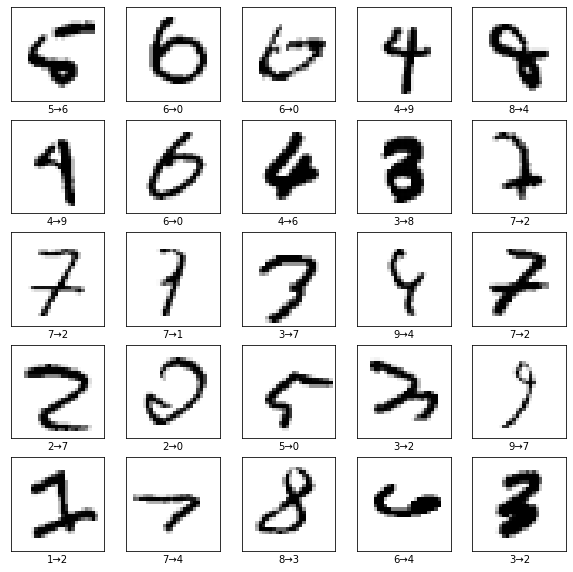

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[sakura[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(str(t[sakura[i]])+'→'+str(answer[i]))
plt.show()

**5. (i) MNIST imshow.py를 수정하여 노멀라이즈한 MNIST 테스트 데이터에 평균은 0이고 표준편차는 $\sigma$인 정규분포를 따라 노이즈를 줘서 다음과 같이 각각 출력하시오. ($\sigma=0.1,0.2,0.5$)**
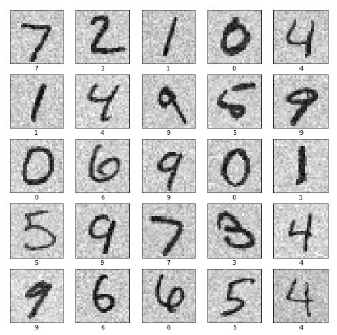

현실에서는 노이즈가 섞이게 마련입니다.
i번째 테스트 데이터 x_test[i][0]에 std * np.random.randn(28,28)을 더함으로써 MNIST 이미지에 노이즈를 섞어줍니다.
표준정규분포에 std를 곱하면 표준편차가 std가 됩니다.

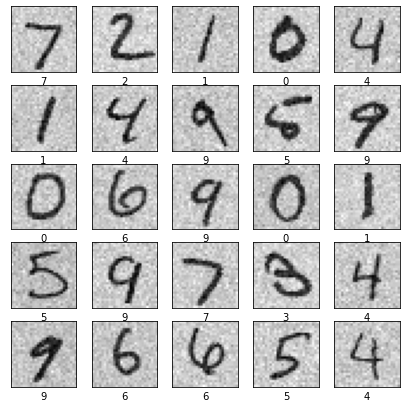

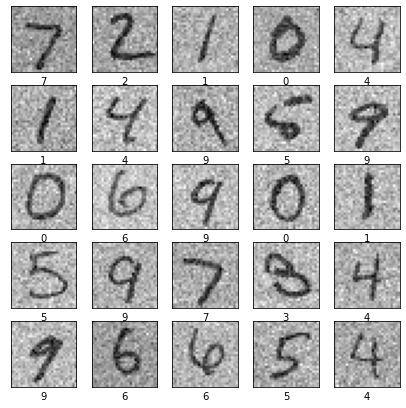

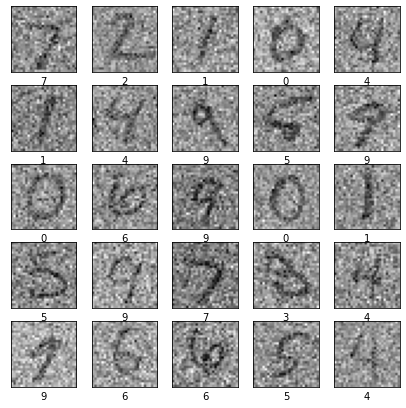

In [14]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=True)

for std in (0.1,0.2,0.5):
    plt.figure(figsize=(7,7))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_test[i][0] + std * np.random.randn(28,28), cmap=plt.cm.binary)
        plt.xlabel(t_test[i])
    plt.show()

**(ii) neuralnet_mnist.py를 수정해서 노멀라이즈한 MNIST 테스트 데이터에 평균은 0이고 표준편차는 $\sigma$인 정규분포를 따라 노이즈를 줘서 각각 정확도를 구하시오. ($\sigma=0.1,0.2,0.5$)**

인공신경망이 노이즈에 대해 상당히 견고하네요.

In [15]:
x, t = get_data()
network = init_network()

for std in (0.1,0.2,0.5):
    accuracy_cnt = 0
    for i in range(len(x)):
        y = predict(network, x[i] + std*np.random.randn(784))
        p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
        if p == t[i]:
            accuracy_cnt += 1

    print("sigma="+str(std)+" : "+str(float(accuracy_cnt) / len(x)))

sigma=0.1 : 0.9324
sigma=0.2 : 0.9235
sigma=0.5 : 0.8487


**6. neuralnet_mnist_batch.py에 다음 코드를 추가하면 다음과 같은 $10 \times 10$ 행렬이 출력이 된다.**

In [16]:
x, t = get_data()
network = init_network()
confusion = np.zeros((10,10), dtype=int)

for k in range(len(x)):
    i=int(t[k])
    y = predict(network, x[k])
    j= np.argmax(y)
    confusion[i][j] += 1
    
print(confusion)

[[ 962    0    3    2    1    3    5    1    3    0]
 [   0 1109    2    2    0    2    5    2   13    0]
 [  13    2  952    7    7    1   15   13   19    3]
 [   1    1   24  937    0   20    1   11   11    4]
 [   1    2    6    0  921    0   12    2    3   35]
 [  10    1    4   34    5  793   14    5   18    8]
 [  16    3    5    1   10    9  910    1    3    0]
 [   4    8   24    5    6    0    0  958    1   22]
 [   5    4    6   19   10   13   14   11  888    4]
 [  12    6    1    9   31    7    1   16    4  922]]


**(i) 신경망이 4를 9라고 답한 횟수를 답하고 그 이유를 설명하시오.**

confusion : 10$\times$10 제로 행렬  
i : k번째 데이터의 라벨  
y : k번째 데이터를 신경망에 입력했을때 출력되는 확률벡터  
j : y에서 제일 큰 확률의 인덱스, 다시말해 신경망이 k번째 데이터에 대해 대답한 숫자  
confusion의 i행 j열에 1을 더해나갑니다. (행과 열은 0부터 셉니다.)  
반복문이 끝나면 confusion의 i행 j열 원소는 라벨이 i인 데이터를 신경망이 j라고 답한 회수가 됩니다.  
따라서, 4를 9라고 답한 회수는 4행 9열에 등장하는 숫자인 35가 됩니다.

**(ii) 대각원이 큰 숫자가 나오는 이유를 설명하시오.**

대각원은 i행 i열이므로 신경망이 i를 보고 i라고 대답한 회수입니다.  
신경망이 맞출때죠.  
신경망이 학습이 잘되었기 때문에 정확도가 높아서 대각에 큰 숫자들이 등장합니다.

**(iii) 다음 값을 출력하도록 코드를 추가하시오.
$$
\text{신경망이 $4$라고 예측한 데이터중 실제 라벨이 $4$인 데이터의 수} \over \text{$4$라고 예측한 데이터의 수}
$$**

In [17]:
print(confusion[4,4]/np.sum(confusion[:,4]))

0.929364278506559


**(iv) 다음 값을 출력하도록 코드를 추가하시오.
$$
\text{라벨이 $4$인 데이터중 신경망이 $4$라고 예측한 데이터의 수} \over \text{라벨이 $4$인 데이터의 수}
$$**

In [18]:
print(confusion[4,4]/np.sum(confusion[4,:]))

0.9378818737270875


**(v) 다음 코드를 추가한 후 실행하면 왼쪽과 같은 이미지가 출력된다. 오른쪽 그림과 같이 틀린 조합이 빈번하면  더 밝게 나오도록 코드를 추가하거나 또는 수정하시오.**

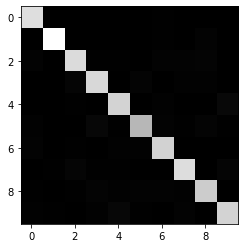

In [19]:
plt.imshow(confusion, cmap=plt.cm.gray)
plt.show()

틀린 조합을 시각화하고 싶습니다.  
그런데 대각이 워낙 숫자가 커서 틀린 조합이 시각적으로 잘 구분이 안가네요.  
그래서 대각원을 강제로 0으로 만든후 시각화를 합니다.

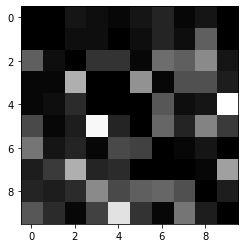

In [20]:
for i in range(len(confusion)):
    confusion[i,i]=0

plt.imshow(confusion, cmap=plt.cm.gray)
plt.show()